# Actividad 1.5
## Unidad Temática Nro 1: 
## Test de hipótesis

- Ejercicio: Test de hipótesis sobre diferencia de proporciones

De los datos presentados en la ejemplo 15, en el cual se realizó un test de hipótesis sobre la proporción de personas que consumen al menos 3 cervezas por día el fin de semana en el Gran La Plata ($p1$), seleccione la zona del Gran Córdoba ($p2$) y compare las proporciones con la de Gran La Plata. ¿Son diferentes las proporciones?
 
A) Proponga el Estadístico conveniente y defina las hipótesis (puede ser de dos colas o de una). <br>
B) Tome la decisión con el test diseñado con el p-valor y mostrando los valores críticos de los intervalos de aceptación y rechazo. <br>

In [1]:
# Importo las bibliotecas necesarias
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pylab 
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import math

In [2]:
# Leo los datos del archivo 'featuresdf.csv' 
data = pd.read_csv("BaseUsuarioENPreCoSP-2011.csv") 
# Filtrado de datos por agrupamiento urbano y seleccion de columna de interes (sin NaNs)
data_cordoba = data[data['AGL_URB'] == 2]['BIBA09_01'].dropna()
data_laplata = data[data['AGL_URB'] == 6]['BIBA09_01'].dropna()
# Consumo de abstemios equivalente a 0
data_laplata[data_laplata == 888.0] = 0
data_cordoba[data_cordoba == 888.0] = 0
# Proporcion de personas que consumen mas de 3 cervezas por dia el fin de semana
p1 = data_laplata[data_laplata > 2].count()/data_laplata.count()
p2 = data_cordoba[data_cordoba > 2].count()/data_cordoba.count()
print('p1: ',round(p1,5))
print('p2: ',round(p2,5))

p1:  0.42647
p2:  0.44554


<b> Se quiere saber si la proporcion de personas que consumen cerveza al menos 3 cervezas por dia en el Gran La Plata y en el Gran Cordoba son iguales. </b>

Se definen las siguientes hipótesis para un test de dos colas:

$$
\left\{
\begin{array}{ll}
H_{0}: &  p_1=p_2=p\\
H_{1}: & p_1\neq p_2
\end{array}
\right.
$$

Utilizamos como estadístico de contraste:

\begin{equation}
Z_0 = \frac{ (P_1-P_2)-(p_1-p_2) }{ \sqrt{ \frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2} } } 
\end{equation}

Como no conzco $p$ se estima el denominador mediante:

\begin{equation}
\sqrt{ P(1-P)(\frac{1}{n_1}+\frac{1}{n_2}) }
\end{equation}

Donde $P=(X_1+X_2)/(n_1+n_2)$

El test a aplicar es un z-test de proporciones que se puede resolver con la función 'proportions_ztest' de statsmodels.

In [3]:
count = np.array([data_laplata[data_laplata > 2].count(), data_cordoba[data_cordoba > 2].count()])
nobs = np.array([data_laplata.count(), data_cordoba.count()])
stat, pval = proportions_ztest(count, nobs)
print('z-statistic:', round(stat,5))
print('two-tailed p-value:', round(pval,5))

z-statistic: -0.4245
two-tailed p-value: 0.6712


Dado que el valor $P > 0.05$ se acepta entonces la hipotesis nula y se rechaza la hipotesis alternativa.

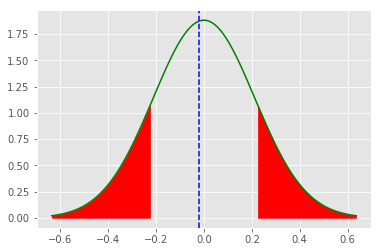

In [4]:
mu = 0
X1 = data_laplata[data_laplata > 2].count()
X2 = data_cordoba[data_cordoba > 2].count()
n1 = data_laplata.count()
n2 = data_cordoba.count()
P = (X1+X2)/(n1+n2)
variance = np.sqrt(P*(1-P)*(1/n1+1/n2))
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
d = stats.norm.pdf(x, mu, sigma)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, d, color='g')
idx = np.searchsorted(x,[-1,stat/2])
sx = x[idx[0]:idx[1]]
sd = d[idx[0]:idx[1]]
plt.fill_between(sx, sd, 0, color = 'r')
idx2 = np.searchsorted(x,[-stat/2,1])
sx2 = x[idx2[0]:idx2[1]]
sd2 = d[idx2[0]:idx2[1]]
plt.fill_between(sx2, sd2, 0, color = 'r')
plt.axvline(stat*variance,0,linestyle='--',color='b')
plt.show()

Se muestra en rojo la region de rechazo y donde cae la observacion con la linea azul discontinua